### profit vs region

This is a bar plot of the regions where movies made the most money. 


I looked at each table to make note of all available columns. I noticed the tconst and nconst columns that I counld use to merge all of the data together into one dataframe. After merging, I dropped many columns that I did not need. These included columns that I though contained duplicate information or information that would not be useful. Next, I dropped rows with null values in a subset of all columns. I used outer merges so there where lots of rows with missing data. I wanted to be sure of the data that I had before getting rid of any. I also did not want to drop rows that were only missing data in either domestic or worldwide gross because I only needed one.

I found a dictionary of country codes and their country names. I used it to map the country names in place of the codes in the region column. This makes the plot labels more meaningful.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#load data
nb = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
takas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
tbase = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
tbase = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
tcrew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
tprinc = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
trat = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
tn = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [3]:
#rename takas['title_id'] to takas['tconst'] to that we can use it to merge on
takas.rename(columns={'title_id':'tconst'},inplace=True)
#merge data
tcombo = trat.merge(tcrew,how='outer',on='tconst')
tcombo = tcombo.merge(tbase,how='outer',on='tconst')
tcombo = tcombo.merge(takas,how='outer',on='tconst')
tcombo = tcombo.merge(tprinc,how='outer',on='tconst')
tcombo = tcombo.merge(nb,how='outer',on='nconst')

#change tcombo['primary_title'] to movie
tcombo.rename(columns={'primary_title':'movie'},inplace=True)
#finish merging
tcombo = tcombo.merge(tn,how='outer',on='movie')
#drop some columns
tcombo.drop(['language','types','attributes','is_original_title','ordering_x','ordering_y','original_title','numvotes','birth_year','death_year'],axis=1,inplace=True)
#drop null values from this subset of columns
tcombo.dropna(subset=['tconst','averagerating','directors','writers','movie','start_year','runtime_minutes','genres','title','region','id','release_date','production_budget'],inplace=True)

#I had lots of duplicates so I dropped the dupes in tconst and movie columns
tcombo.drop_duplicates(subset=['tconst','movie'],inplace=True)

#change budget and gross types to int
tcombo['production_budget'] = tcombo['production_budget'].map(lambda x: x.replace('$',""))
tcombo['production_budget'] = tcombo['production_budget'].map(lambda x: x.replace(',',""))
tcombo['domestic_gross'] = tcombo['domestic_gross'].map(lambda x: x.replace('$',""))
tcombo['domestic_gross'] = tcombo['domestic_gross'].map(lambda x: x.replace(',',""))
tcombo['worldwide_gross'] = tcombo['worldwide_gross'].map(lambda x: x.replace('$',""))
tcombo['worldwide_gross'] = tcombo['worldwide_gross'].map(lambda x: x.replace(',',""))
tcombo.production_budget = tcombo.production_budget.astype(float)
tcombo.domestic_gross = tcombo.domestic_gross.astype(float)
tcombo.worldwide_gross = tcombo.worldwide_gross.astype(float)

#making a new column called release month
tcombo['release_month'] = tcombo['release_date'].map(lambda x: x[:3])

#make profit column
tcombo['profit'] = (tcombo['worldwide_gross'] - tcombo['production_budget'])

#drop rows in gross and budget that are zero
tcombo = tcombo.loc[((tcombo['domestic_gross'] != 0) | (tcombo['worldwide_gross'] != 0)) & (tcombo['production_budget'] != 0)]

#### Country Code Dictionary

I found a dictionary of country codes so I can map them and use the actual country name on the graph.

In [4]:
CC = {
    "AF": "AFGHANISTAN",
    "AX": "ÅLAND ISLANDS",
    "AL": "ALBANIA",
    "DZ": "ALGERIA",
    "AS": "AMERICAN SAMOA",
    "AD": "ANDORRA",
    "AO": "ANGOLA",
    "AI": "ANGUILLA",
    "AQ": "ANTARCTICA",
    "AG": "ANTIGUA AND BARBUDA",
    "AR": "ARGENTINA",
    "AM": "ARMENIA",
    "AW": "ARUBA",
    "AU": "AUSTRALIA",
    "AT": "AUSTRIA",
    "AZ": "AZERBAIJAN",
    "BS": "BAHAMAS",
    "BH": "BAHRAIN",
    "BD": "BANGLADESH",
    "BB": "BARBADOS",
    "BY": "BELARUS",
    "BE": "BELGIUM",
    "BZ": "BELIZE",
    "BJ": "BENIN",
    "BM": "BERMUDA",
    "BT": "BHUTAN",
    "BO": "BOLIVIA, PLURINATIONAL STATE OF",
    "BQ": "BONAIRE, SINT EUSTATIUS AND SABA",
    "BA": "BOSNIA AND HERZEGOVINA",
    "BW": "BOTSWANA",
    "BV": "BOUVET ISLAND",
    "BR": "BRAZIL",
    "IO": "BRITISH INDIAN OCEAN TERRITORY",
    "BN": "BRUNEI DARUSSALAM",
    "BG": "BULGARIA",
    "BF": "BURKINA FASO",
    "BI": "BURUNDI",
    "KH": "CAMBODIA",
    "CM": "CAMEROON",
    "CA": "CANADA",
    "CV": "CAPE VERDE",
    "KY": "CAYMAN ISLANDS",
    "CF": "CENTRAL AFRICAN REPUBLIC",
    "TD": "CHAD",
    "CL": "CHILE",
    "CN": "CHINA",
    "CX": "CHRISTMAS ISLAND",
    "CC": "COCOS (KEELING) ISLANDS",
    "CO": "COLOMBIA",
    "KM": "COMOROS",
    "CG": "CONGO",
    "CD": "CONGO, THE DEMOCRATIC REPUBLIC OF THE",
    "CK": "COOK ISLANDS",
    "CR": "COSTA RICA",
    "CI": "CÔTE D'IVOIRE",
    "HR": "CROATIA",
    "CU": "CUBA",
    "CW": "CURAÇAO",
    "CY": "CYPRUS",
    "CZ": "CZECH REPUBLIC",
    "DK": "DENMARK",
    "DJ": "DJIBOUTI",
    "DM": "DOMINICA",
    "DO": "DOMINICAN REPUBLIC",
    "EC": "ECUADOR",
    "EG": "EGYPT",
    "SV": "EL SALVADOR",
    "GQ": "EQUATORIAL GUINEA",
    "ER": "ERITREA",
    "EE": "ESTONIA",
    "ET": "ETHIOPIA",
    "FK": "FALKLAND ISLANDS (MALVINAS)",
    "FO": "FAROE ISLANDS",
    "FJ": "FIJI",
    "FI": "FINLAND",
    "FR": "FRANCE",
    "GF": "FRENCH GUIANA",
    "PF": "FRENCH POLYNESIA",
    "TF": "FRENCH SOUTHERN TERRITORIES",
    "GA": "GABON",
    "GM": "GAMBIA",
    "GE": "GEORGIA",
    "DE": "GERMANY",
    "GH": "GHANA",
    "GI": "GIBRALTAR",
    "GR": "GREECE",
    "GL": "GREENLAND",
    "GD": "GRENADA",
    "GP": "GUADELOUPE",
    "GU": "GUAM",
    "GT": "GUATEMALA",
    "GG": "GUERNSEY",
    "GN": "GUINEA",
    "GW": "GUINEA-BISSAU",
    "GY": "GUYANA",
    "HT": "HAITI",
    "HM": "HEARD ISLAND AND MCDONALD ISLANDS",
    "VA": "HOLY SEE (VATICAN CITY STATE)",
    "HN": "HONDURAS",
    "HK": "HONG KONG",
    "HU": "HUNGARY",
    "IS": "ICELAND",
    "IN": "INDIA",
    "ID": "INDONESIA",
    "IR": "IRAN, ISLAMIC REPUBLIC OF",
    "IQ": "IRAQ",
    "IE": "IRELAND",
    "IM": "ISLE OF MAN",
    "IL": "ISRAEL",
    "IT": "ITALY",
    "JM": "JAMAICA",
    "JP": "JAPAN",
    "JE": "JERSEY",
    "JO": "JORDAN",
    "KZ": "KAZAKHSTAN",
    "KE": "KENYA",
    "KI": "KIRIBATI",
    "KP": "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",
    "KR": "KOREA, REPUBLIC OF",
    "KW": "KUWAIT",
    "KG": "KYRGYZSTAN",
    "LA": "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
    "LV": "LATVIA",
    "LB": "LEBANON",
    "LS": "LESOTHO",
    "LR": "LIBERIA",
    "LY": "LIBYA",
    "LI": "LIECHTENSTEIN",
    "LT": "LITHUANIA",
    "LU": "LUXEMBOURG",
    "MO": "MACAO",
    "MK": "MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF",
    "MG": "MADAGASCAR",
    "MW": "MALAWI",
    "MY": "MALAYSIA",
    "MV": "MALDIVES",
    "ML": "MALI",
    "MT": "MALTA",
    "MH": "MARSHALL ISLANDS",
    "MQ": "MARTINIQUE",
    "MR": "MAURITANIA",
    "MU": "MAURITIUS",
    "YT": "MAYOTTE",
    "MX": "MEXICO",
    "FM": "MICRONESIA, FEDERATED STATES OF",
    "MD": "MOLDOVA, REPUBLIC OF",
    "MC": "MONACO",
    "MN": "MONGOLIA",
    "ME": "MONTENEGRO",
    "MS": "MONTSERRAT",
    "MA": "MOROCCO",
    "MZ": "MOZAMBIQUE",
    "MM": "MYANMAR",
    "NA": "NAMIBIA",
    "NR": "NAURU",
    "NP": "NEPAL",
    "NL": "NETHERLANDS",
    "NC": "NEW CALEDONIA",
    "NZ": "NEW ZEALAND",
    "NI": "NICARAGUA",
    "NE": "NIGER",
    "NG": "NIGERIA",
    "NU": "NIUE",
    "NF": "NORFOLK ISLAND",
    "MP": "NORTHERN MARIANA ISLANDS",
    "NO": "NORWAY",
    "OM": "OMAN",
    "PK": "PAKISTAN",
    "PW": "PALAU",
    "PS": "PALESTINE, STATE OF",
    "PA": "PANAMA",
    "PG": "PAPUA NEW GUINEA",
    "PY": "PARAGUAY",
    "PE": "PERU",
    "PH": "PHILIPPINES",
    "PN": "PITCAIRN",
    "PL": "POLAND",
    "PT": "PORTUGAL",
    "PR": "PUERTO RICO",
    "QA": "QATAR",
    "RE": "RÉUNION",
    "RO": "ROMANIA",
    "RU": "RUSSIAN FEDERATION",
    "RW": "RWANDA",
    "BL": "SAINT BARTHÉLEMY",
    "SH": "SAINT HELENA, ASCENSION AND TRISTAN DA CUNHA",
    "KN": "SAINT KITTS AND NEVIS",
    "LC": "SAINT LUCIA",
    "MF": "SAINT MARTIN (FRENCH PART)",
    "PM": "SAINT PIERRE AND MIQUELON",
    "VC": "SAINT VINCENT AND THE GRENADINES",
    "WS": "SAMOA",
    "SM": "SAN MARINO",
    "ST": "SAO TOME AND PRINCIPE",
    "SA": "SAUDI ARABIA",
    "SN": "SENEGAL",
    "RS": "SERBIA",
    "SC": "SEYCHELLES",
    "SL": "SIERRA LEONE",
    "SG": "SINGAPORE",
    "SX": "SINT MAARTEN (DUTCH PART)",
    "SK": "SLOVAKIA",
    "SI": "SLOVENIA",
    "SB": "SOLOMON ISLANDS",
    "SO": "SOMALIA",
    "ZA": "SOUTH AFRICA",
    "GS": "SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS",
    "SS": "SOUTH SUDAN",
    "ES": "SPAIN",
    "LK": "SRI LANKA",
    "SD": "SUDAN",
    "SR": "SURINAME",
    "SJ": "SVALBARD AND JAN MAYEN",
    "SZ": "SWAZILAND",
    "SE": "SWEDEN",
    "CH": "SWITZERLAND",
    "SY": "SYRIAN ARAB REPUBLIC",
    "TW": "TAIWAN, PROVINCE OF CHINA",
    "TJ": "TAJIKISTAN",
    "TZ": "TANZANIA, UNITED REPUBLIC OF",
    "TH": "THAILAND",
    "TL": "TIMOR-LESTE",
    "TG": "TOGO",
    "TK": "TOKELAU",
    "TO": "TONGA",
    "TT": "TRINIDAD AND TOBAGO",
    "TN": "TUNISIA",
    "TR": "TURKEY",
    "TM": "TURKMENISTAN",
    "TC": "TURKS AND CAICOS ISLANDS",
    "TV": "TUVALU",
    "UG": "UGANDA",
    "UA": "UKRAINE",
    "AE": "UNITED ARAB EMIRATES",
    "GB": "UNITED KINGDOM",
    "US": "UNITED STATES",
    "UM": "UNITED STATES MINOR OUTLYING ISLANDS",
    "UY": "URUGUAY",
    "UZ": "UZBEKISTAN",
    "VU": "VANUATU",
    "VE": "VENEZUELA, BOLIVARIAN REPUBLIC OF",
    "VN": "VIET NAM",
    "VG": "VIRGIN ISLANDS, BRITISH",
    "VI": "VIRGIN ISLANDS, U.S.",
    "WF": "WALLIS AND FUTUNA",
    "EH": "WESTERN SAHARA",
    "YE": "YEMEN",
    "ZM": "ZAMBIA",
    "ZW": "ZIMBABWE",
}

### Region Plot

A barplot of the profitable regions (countries)

Below is where I do the actual mapping with a lambda function.

In [5]:
tcombo_profit_region_median = tcombo[['profit','region']].sort_values(by='profit',ascending=False)[:12]

#map cCodes to tcombo_profit_region
tcombo_profit_region_median['region'] = tcombo_profit_region_median['region'].map(lambda x: CC[x].title())

tcombo_profit_region_median = tcombo_profit_region_median.groupby(['region']).median().sort_values(by='profit',ascending=False)[:5]


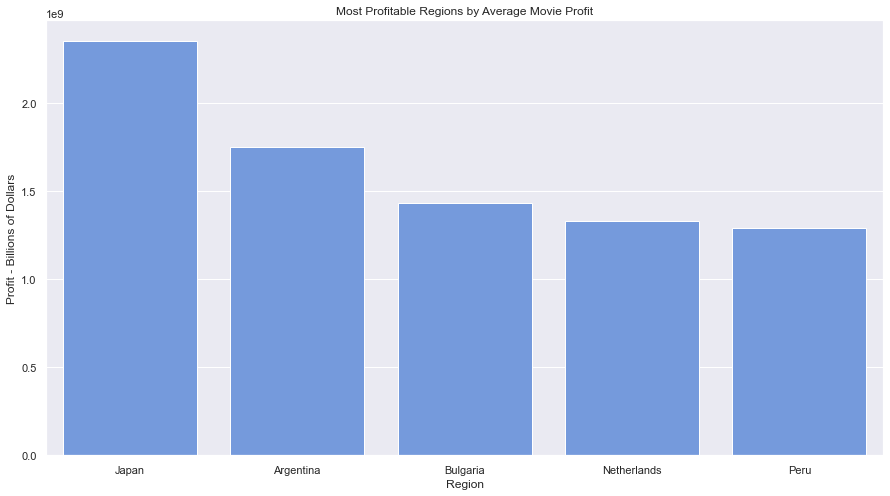

In [8]:
sns.set_theme(context='notebook',style="darkgrid")

sns.set(rc={'figure.figsize':(15,8)})   

ax = sns.barplot(x=tcombo_profit_region_median.index,y='profit',data=tcombo_profit_region_median,color='cornflowerblue')

ax.set(xlabel='Region',ylabel='Profit - Billions of Dollars',title='Most Profitable Regions by Average Movie Profit');